<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencv9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255.

we use thresholding to focus on objects or ar- eas of particular interest in an image.

Applying simple thresholding methods requires human in- tervention. We must specify a threshold value T. All pixel intensities below T are set to 0. And all pixel intensities greater than T are set to 255.<br>
We can also apply the inverse of this binarization by set- ting all pixels below T to 255 and all pixel intensities greater than T to 0.

In [ ]:
!pip install mahotas

In [1]:
import numpy as np
import mahotas
import cv2
from google.colab.patches import cv2_imshow

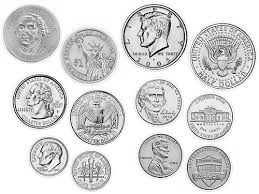

In [3]:
image = cv2.imread("coins.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Blue the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(image)

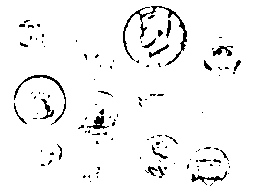

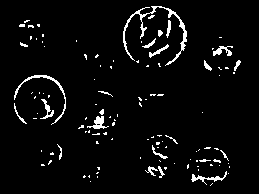

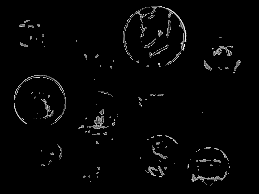

In [7]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
#binarization with threshold
cv2_imshow(thresh)
#inverse the binarization
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv) 
#mask and inverse the binarization
cv2_imshow(cv2.bitwise_and(image, image, mask =threshInv))

Adaptive Thresholding

One of the downsides of using simple thresholding meth- ods is that we need to manually supply our threshold value T. Not only does finding a good value of T require a lot of manual experiments and parameter tunings, it’s not very helpful if the image exhibits a lot of range in pixel intensi- ties.

using the cv2.adaptiveThreshold function on Line 15. The first parameter we supply is the image we want to threshold. Then, we supply our maximum value of 255, similar to simple thresholding mentioned above.
The third argument is our method to compute the thresh- old for the current neighborhood of pixels. By supplying cv2.ADAPTIVE_THRESH_MEAN_C, we indicate that we want to compute the mean of the neighborhood of pixels and treat it as our T value.

choosing between mean adaptive threshold- ing and Gaussian adaptive thresholding requires a few ex- periments on your end. The most important parameters to vary are the neighborhood size and C, the value you subtract from the mean.

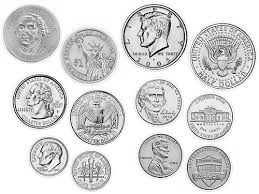

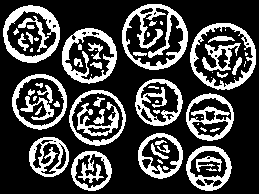

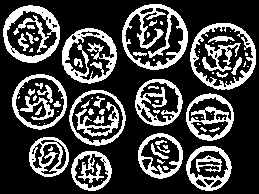

In [9]:
image = cv2.imread("coins.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(image)

thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
cv2_imshow( thresh)

#Gaussian thresholding
thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
cv2_imshow(thresh)

Another way we can automatically compute the threshold value of T is to use Otsu’s method.


Otsu’s method assumes there are two peaks in the grayscale histogram of the image. It then tries to find an optimal value to separate these two peaks – thus our value of T.

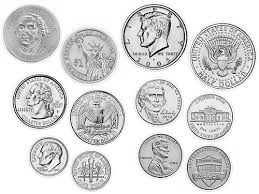

Otsu’s threshold: 214


In [12]:

image = cv2.imread("coins.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(image)
T = mahotas.thresholding.otsu(blurred)
print("Otsu’s threshold: {}".format(T))

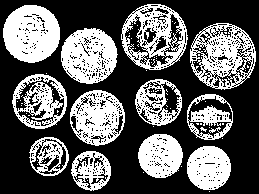

Riddler-Calvard: 214.82715104000079


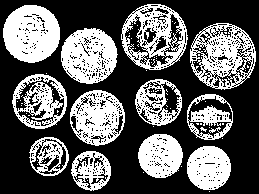

In [14]:
thresh = image.copy()
#Any values greater than the threshold, make white
thresh[thresh > T] = 255
#All other values are made 0
thresh[thresh < 255] = 0
#invert the threshold
thresh = cv2.bitwise_not(thresh)
cv2_imshow(thresh)

T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
cv2_imshow(thresh)